In [1]:
import pandas as pd
import numpy as np

#Graficos
import matplotlib.pyplot as plt
import seaborn as sn
from sklearn.externals.six import StringIO  
from IPython.display import Image  
import pydotplus
from sklearn.tree import export_graphviz

#ML
from sklearn.tree import DecisionTreeClassifier
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_validate
from sklearn.metrics import make_scorer
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn import tree

* El dataset inscripción corresponde al listado de personas que se inscriben en el programa "Salud Visual" de la Alcaldía de Medellín el cual busca asignar recursos del presupuesto participativo que se asignaron a la atención visual sobre las personas mayores de 18 años
* El dataset atención corresponde al listado de pacientes atendidos en el programa 
* El dataset sintomas corresponde a la información de descripción del dataset inscripcion, las cuales fueron procesadas en Atlas TI para determinar molestias claves

In [2]:
atencion = pd.read_excel('ATENCIONES_D.xlsx',sheet_name='ATENCIONES', skiprows = 1)
inscripcion = pd.read_excel('INSCRIPCIONES_D.xlsx',sheet_name='INSCRITOS')
sintomas = pd.read_excel('Sintomas.xlsx',sheet_name='sintomas')

Integración de bases de datos de atención, inscripción y sintomas

In [3]:
inscritos_sintomas = inscripcion.merge(sintomas, on = ['ID','Ficho_Inscripcion'], how = 'left' )

In [4]:
inscritos_sintomas.shape

(11495, 43)

In [7]:
optometria_raw = atencion.merge(inscritos_sintomas, on = 'ID')

In [8]:
optometria_raw.shape

(7835, 81)

In [193]:
optometria_raw.describe()

,CONSECUTIVO,ID,EDAD,CONSULTA,ESTUCHE Y PAÑO,MONTURA,EJE-OD,2\nLentes monofocales en CR-39 tallados,3\nLentes monofocales en policarbonato terminados\n,5\nLentes bifocales flat top CR-39 terminados,...,Dificultad_para_ver,Dificultad_para_leer_letras_pequeñas,Leer_a_una_distancia_mayor_,Secreciones_(Pus_o_mucosidad),Leer_a_una_distancia_menor_,Ojos_Enrojecidos,Mareos_migraña_y_vomito,Inflamación,Temblor_en_los_ojos,Cestelleos_manchas_flotantes_y_desprendimiento_de_la_retina
count,7835.000000,7.835000e+03,7835.000000,7835.0,7500.0,7500.0,4437.000000,7828.000000,7828.000000,7835.000000,...,7812.000000,7812.000000,7812.000000,7812.000000,7812.000000,7812.000000,7812.000000,7812.000000,7812.000000,7812.000000
mean,46784.997320,6.023104e+12,48.229483,1.0,1.0,1.0,67.866464,0.034875,0.107179,0.023229,...,0.041603,0.500000,0.134665,0.259089,0.075397,0.278290,0.023938,0.011393,0.003456,0.000384
std,2726.901704,7.393404e+13,14.564232,0.0,0.0,0.0,51.269433,0.233701,0.440837,0.198209,...,0.199692,0.500032,0.341387,0.438162,0.264047,0.448186,0.152864,0.106134,0.058692,0.019594
min,4545.000000,1.919140e+05,0.000000,1.0,1.0,1.0,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,44493.500000,4.202333e+07,39.000000,1.0,1.0,1.0,15.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,46988.000000,4.353290e+07,51.000000,1.0,1.0,1.0,80.000000,0.000000,0.000000,0.000000,...,0.000000,0.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,48977.500000,7.172321e+07,57.000000,1.0,1.0,1.0,95.000000,0.000000,0.000000,0.000000,...,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
max,61977.000000,9.636632e+14,99.000000,1.0,1.0,1.0,180.000000,2.000000,2.000000,2.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


Del análisis preliminar de la información los pacientes atendidos, se depuran las variables no estan categorizadas en función del diagnostico

Caracteristicas usadas para generar cobro

* Tipo de lente
* Total lentes unitarios
* Valor_usuario
* Referencia_montura
* Lentes monofocales en CR-39 terminados
* Lentes monofocales en CR-39 tallados
* Lentes monofocales en policarbonato terminados
* Lentes monofocales en policarbonato tallado
* Lentes bifocales flat top CR-39 terminados
* Lentes bifocales flat top CR-39 tallados
* Lentes bifocales flat top policarbonato
* Lentes bifocales invisible CR-39 terminados
* Lentes bifocales invisible CR-39 tallados
* Lentes bifocales invisible policarbonato
* Lentes progresivos en CR-39
* Lentes progresivos en policarbonato

Carateristicas de identificación
* Consecutivo. Corresponde al id entregado en la atención y no aporta información al modelo
* Ficho de inscripcion
* Direccion Residencia
* Fecha de nacimiento
* Tipo de documento
* Barrio
* Direccion Correspondencia
* Sisben 
* Descripcion

Caracteristicas de uso administrativo de la Alcaldía de Medellín
* Poblacion
* Etnia. 
* Ocupación. 


El diagnostico Z010 corresponde a una consulta ....pendiente optometra

Selección de características a partir del juicio del experto

In [100]:
columnas = ['EDAD','CONSULTA','ESTUCHE Y PAÑO','MONTURA', 'DX\nPPAL\nCIE 10','ESFERA-OD','CILINDRO-OD','EJE-OD','ADD-OD','ESFERA-OI','CILINDRO-OI','EJE-OI','ADD-OI','Genero','Exam_ojos','Usa_Gafas','Tiem_gafas','Glaucoma','Enfermedad','Picazón_irritación_Ardor', 'Ojos_cansados_doloridos', 'Ojos_llorosos', 'Ojos_secos', 'Visión_borrosa', 'Visión_doble', 'Mayor_sensibilidad_a_la_luz',
'Dificultad_para_ver', 'Dificultad_para_leer_letras_pequeñas', 'Leer_a_una_distancia_mayor_', 'Secreciones_(Pus_o_mucosidad)',      'Leer_a_una_distancia_menor_', 'Ojos_Enrojecidos', 'Mareos_migraña_y_vomito', 'Inflamación', 'Temblor_en_los_ojos',       'Cestelleos_manchas_flotantes_y_desprendimiento_de_la_retina','ID']

In [101]:
optometria_dep = optometria_raw[columnas]

Ajuste de forma de encabezado

In [102]:
optometria_dep.rename(columns={'DX\nPPAL\nCIE 10':'Diagnostico'}, inplace = True)
optometria_dep.rename(str.lower, axis='columns', inplace = True)

Análisis de los datos

In [103]:
#Se borran los registros duplicados por id en caso de que existan
optometria_dep.drop_duplicates('id', keep = 'last', inplace = True)

In [14]:
optometria_dep.shape

(7824, 38)

In [104]:
#Se eliminan toda aquellas filas que contengan en todos su campos valores nulos
optometria_dep.dropna(how = 'all', inplace = True)

In [16]:
optometria_dep.shape

(7824, 38)

EDAD
La edades oscilan entre los 19 a 81 anios, teniendo unos valores atipicos atipicos por encima de 81 anios y de cero anios.
En la fuente de datos, la edad más frecuente es 59

In [68]:
optometria_dep['edad'].describe()

count    8138.000000
mean       47.986483
std        14.594610
min         0.000000
25%        39.000000
50%        51.000000
75%        57.000000
max        99.000000
Name: edad, dtype: float64

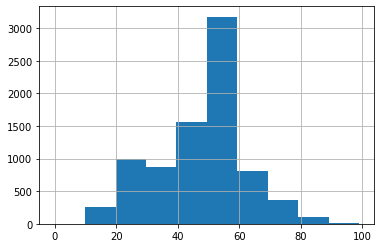

In [69]:
optometria_dep['edad'].hist() 

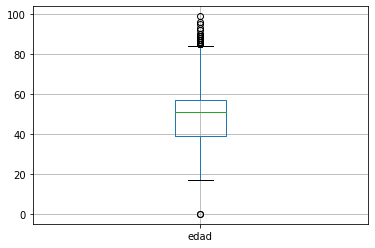

In [70]:
optometria_dep.boxplot('edad')

In [105]:
optometria_dep[pd.isnull(optometria_dep['edad'])]

,edad,consulta,estuche y paño,montura,diagnostico,esfera-od,cilindro-od,eje-od,add-od,esfera-oi,...,dificultad_para_leer_letras_pequeñas,leer_a_una_distancia_mayor_,secreciones_(pus_o_mucosidad),leer_a_una_distancia_menor_,ojos_enrojecidos,mareos_migraña_y_vomito,inflamación,temblor_en_los_ojos,cestelleos_manchas_flotantes_y_desprendimiento_de_la_retina,id


Se revisan los outliers de edad. El programa "Salud Visual" esta diseniado para mayores de edad, por lo tanto se restringuen los valores del data frame bajo este criterio

In [106]:
optometria_dep.drop(optometria_dep[optometria_dep['edad'] < 18].index, axis = 0, inplace = True)

In [19]:
optometria_dep.shape

(7822, 38)

CONSULTA. La consulta toma el valor de 1, lo cual quiere decir que fue atendido, dado que hay poca varibilidad se considera candidata a eliminar

In [74]:
optometria_dep['consulta'].describe()

count    8135.0
mean        1.0
std         0.0
min         1.0
25%         1.0
50%         1.0
75%         1.0
max         1.0
Name: consulta, dtype: float64

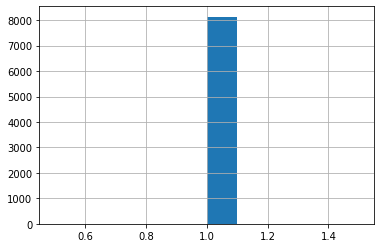

In [75]:
optometria_dep['consulta'].hist() 

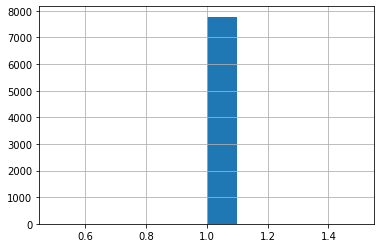

In [76]:
optometria_dep['estuche y paño'].hist()

In [77]:
optometria_dep['estuche y paño'].unique()

array([ 1., nan])

Se completan los valores de las preguntas se le dio estuche y paño y montura con los valores de 1 y 0 para Si y No respectivamente

In [107]:
values_em = {'estuche y paño': 0, 'montura' : 0}

In [108]:
optometria_dep.fillna(value = values_em, inplace = True)

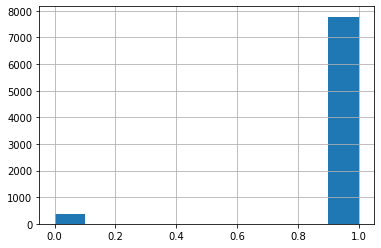

In [132]:
optometria_dep['montura'].hist()

In [133]:
optometria_dep.groupby(['montura'])['montura'].count()

montura
0.0     356
1.0    7779
Name: montura, dtype: int64

In [134]:
optometria_dep.groupby(['estuche y paño'])['estuche y paño'].count()

estuche y paño
0.0     356
1.0    7779
Name: estuche y paño, dtype: int64

In [ ]:
Las variables estuche y paño y montura indican que al paciente le recetaron gafas, por lo tanto se puede agrupar en usa sola dimensión.

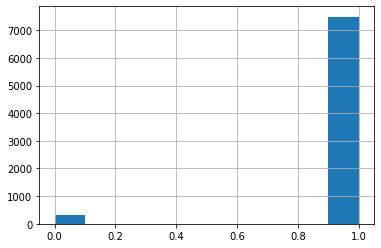

In [109]:
optometria_dep['requiere_gafas'] = np.where((optometria_dep['estuche y paño'] == 1) & (optometria_dep['montura'] == 1),1,0) #1 Tiene gafas, 0 no tiene
optometria_dep['requiere_gafas'].hist()

Los diagnosticos con mayor frecuencia en el estudio realizado en el 2019 son H524 - Presbicia, H522 - Astigmatismo, H521 - Miopía. El diagnostico Z010 significa que el paciente fue diagnosticado sin enfermedad visual.

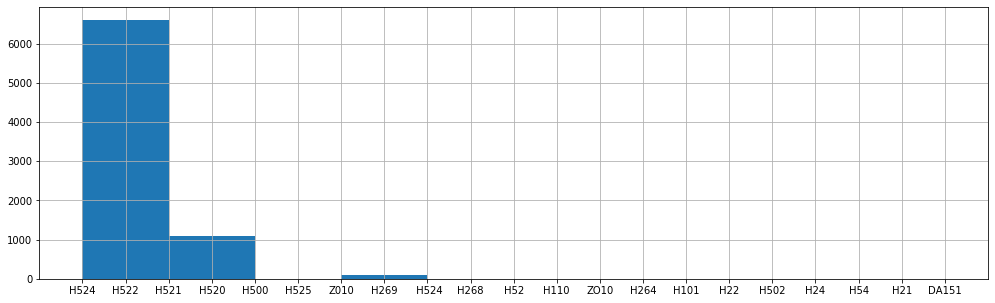

In [110]:
optometria_dep['diagnostico'] = optometria_dep['diagnostico'].str.upper()
optometria_dep['diagnostico'].hist(figsize = (17,5))

In [138]:
optometria_dep['diagnostico'].unique()

array(['H524', 'H522', 'H521', 'H520', 'H500', 'H525', 'Z010', 'H269',
       ' H524', 'H268', 'H52', 'H110', 'ZO10', 'H264', 'H101', 'H22', nan,
       'H50', 'H420', 'H502', 'H24', 'H54', 'H21', 'DA151'], dtype=object)

Se depuran los registros que no tienen diagnostico, en caso de que existan

In [111]:
optometria_dep.drop(optometria_dep[optometria_dep['diagnostico'].isnull()].index, axis = 0, inplace = True)

In [25]:
optometria_dep.shape

(7822, 39)

Análisis de medidas visuales

* El valor de balance se refiere a cuando un ojo no recupera visión, el optometra le asigna una fórmula similar a la del otro ojo 
* N significa neutro y toma valor a cero
* Los valores impracticable y no aplica significan que el examen por alguna razón no se puedo prácticar, se eliminan los registros que tomen ese valor del todo el dataset

In [87]:
optometria_dep['esfera-od'].unique()

array([2, 0.0, -1, 1.5, -0.25, 2.75, -1.25, 3.5, -0.5, 0.25, 1, 0.75,
       3.25, 0.5, 1.25, -1.5, -3, 2.5, 1.75, -2.75, 3, -0.75, -6, -2.5,
       -2, 2.25, -8.5, -3.5, 4, '-0.25', -7, nan, 4.5, -0.258, -7.5, 5.5,
       -4.5, 3.75, 5, -1.75, -4.25, -3.25, -7.25, -4, -11, -4.75, 4.25,
       -6.5, -2.25, 6, -8, -9, -5, -5.5, 6.5, -12, -14, 7, 6.75, -6.75,
       10, -11.5, 9, 2.501, -3.75, -6.25, 0.501, '-15.00', -18, '-0.50',
       '-8.00', '-7.00', '-1.00', -8.75, -11.75, -8.25, 5.25, 8, 4.75,
       -5.75, 7.5, 8.5, -19, -15, -1.74, -20, 6.25, 1.56], dtype=object)

In [112]:
optometria_dep['esfera-od'] = np.where((optometria_dep['esfera-od']  == 'N') | (optometria_dep['esfera-od']  == 'n') | (optometria_dep['esfera-od']  == ' N') | (optometria_dep['esfera-od']  == 'N ') | (optometria_dep['esfera-od']  == ' n') | (optometria_dep['esfera-od']  == 'n '), 0.0, optometria_dep['esfera-od'])
optometria_dep['esfera-od'] = np.where((optometria_dep['esfera-od']  == 'BALANCE') | (optometria_dep['esfera-od']  == 'BALANCE '), optometria_dep['esfera-oi'], optometria_dep['esfera-od']) 

In [113]:
optometria_dep.drop((optometria_dep[optometria_dep['esfera-od'] == 'IMPRACTICABLE'].index) | (optometria_dep[optometria_dep['esfera-od'] == 'IMPRACTICABLE '].index) | (optometria_dep[optometria_dep['esfera-od'] == 'NO APLICA '].index) | (optometria_dep[optometria_dep['esfera-od'] == 'NO APLICA '].index), axis = 0, inplace = True)

In [88]:
optometria_dep['cilindro-od'].unique()

array([-0.5, -0.75, -2.5, nan, -1, -0.25, -1.5, -3, -3.5, -4.5, -1.25, -2,
       -1.75, '-2.00', -2.25, -2.75, -3.25, -5, ' ', -5.5, '-1.25', -4,
       -4.75, -6, '-0.75', '-5.00', -7, -3.75, '-0.50', -0.258, '-7.00',
       '-1.00', '-1.50', '-2.50', -0.59, 'BALANCE', -3.2, 'BALANCE ',
       -1.2, -0.6, -2.752, -6.5, -0.754], dtype=object)

In [114]:
optometria_dep['cilindro-od'] = np.where((optometria_dep['cilindro-od']  == 'BALANCE') | (optometria_dep['cilindro-od']  == 'BALANCE '), optometria_dep['cilindro-oi'], optometria_dep['cilindro-od']) 
optometria_dep['cilindro-od'] = np.where((optometria_dep['cilindro-od'] == ' '), np.nan, optometria_dep['cilindro-od'])

In [29]:
optometria_dep['add-od'].unique()

array([nan, 2.75, 2, 2.25, 1.25, 1.75, 1.5, 2.5, 3, 1, -1, '   ', 2.275,
       ' ', 0.75, 3.5, -1.75, -2.5, 1.45, -1.5, 2.26], dtype=object)

In [115]:
#optometria_dep['add-od'] = optometria_dep['add-od'].str.strip()
optometria_dep['add-od'] = np.where((optometria_dep['add-od'] == '   ') | (optometria_dep['add-od'] == ' '),np.nan,optometria_dep['add-od'])

In [213]:
optometria_dep['esfera-oi'].unique()

array([2, -0.5, -1, 1.25, 'N', -0.25, 2.75, -2.5, 0.25, 3.75, 1.5, 1, 0.5,
       0.75, -1.75, 2.5, -1.5, 2.25, -1.25, -0.75, 1.75, 3, -5.5, -2,
       -3.75, 4, -7, 4.5, nan, -6, -7.5, 5, -4, -4.5, 3.5, 3.25, '-0.25',
       -10, 5.5, -8, -4.25, -3, -6.5, -6.25, '-5.00', 'N ', -3.25, -5,
       -2.25, 6.5, -3.5, -2.75, 6, -7.75, -9, -13, 6.75, -8.5, 11, -12,
       7.5, 0.501, -5.75, ' N', 4.25, -4.75, -15.75, -18, 1.2, '-1.00', 7,
       4.75, 0.72, -1.72, 10, 8, 5.25, 'n', 10.5, -20, 8.5, 0.025, -1.74,
       5.75, -10.5], dtype=object)

In [116]:
optometria_dep['esfera-oi'] = np.where((optometria_dep['esfera-oi']  == 'N') | (optometria_dep['esfera-oi']  == ' N') | (optometria_dep['esfera-oi']  == 'N ') | (optometria_dep['esfera-oi']  == 'n') | (optometria_dep['esfera-oi']  == ' n') | (optometria_dep['esfera-oi']  == 'n '), 0.0, optometria_dep['esfera-oi'])

optometria_dep.drop((optometria_dep[optometria_dep['esfera-oi'] == 'NO APLICA '].index) | (optometria_dep[optometria_dep['esfera-oi'] == 'NO APLICA'].index), axis = 0, inplace = True)

In [94]:
optometria_dep['cilindro-oi'].unique() 

array([-0.25, nan, -2.5, -0.75, -0.5, -1.25, -1, -1.5, -4, -6.5, -2,
       -1.75, -2.75, -4.5, -2.25, '-2.00', 'N', -4.25, -3, -3.75, -3.5,
       -4.75, '-0.50', -5, 0.5, -5.75, 'BALANCE', -5.5, -0.5018, -0.50135,
       -7, -3.25, 0.75, 0.25, '-1.00', '-1.50', '-0.75', 'BALANCE ', 1.5,
       -8, -6, 2.25], dtype=object)

In [117]:
optometria_dep['cilindro-oi'] = np.where((optometria_dep['cilindro-oi']  == 'N'), 0.0, optometria_dep['cilindro-oi'])

optometria_dep['cilindro-oi'] = np.where((optometria_dep['cilindro-oi']  == 'BALANCE') | (optometria_dep['cilindro-oi']  == 'BALANCE '), optometria_dep['cilindro-od'], optometria_dep['cilindro-oi']) 

In [96]:
optometria_dep['eje-od'].unique()

array([100.  ,  70.  ,   5.  ,    nan,  90.  ,  40.  , 105.  ,  50.  ,
        30.  ,  80.  ,  10.  , 160.  ,  25.  ,  95.  , 170.  ,  20.  ,
         0.  ,  75.  ,  60.  ,  45.  ,  85.  ,  15.  , 135.  , 110.  ,
       175.  , 115.  , 120.  , 165.  ,  35.  , 130.  , 155.  , 125.  ,
       150.  , 140.  ,  55.  ,  65.  , 145.  ,   0.25, 180.  ,   2.  ,
         3.  ,  12.  ,  76.  , 168.  ,   2.25])

In [97]:
optometria_dep['eje-oi'].unique()

array([80, nan, 15, 50, 90, 5, 160, 10, 150, 170, 115, 140, 120, 60, 100,
       70, 0, 85, 45, 175, 65, 135, 75, 25, 20, 145, 95, 30, 40, 110, 165,
       155, 130, 162, 105, 2.5, 180, 'O', 55, 35, 91, 125, 164, 8, 66],
      dtype=object)

In [118]:
optometria_dep['eje-oi'] = np.where((optometria_dep['eje-oi'] == 'O'), 0.0, optometria_dep['add-oi'])
optometria_dep['eje-oi'] = np.where((optometria_dep['eje-oi'] == ' '), np.nan, optometria_dep['add-oi'])

In [99]:
optometria_dep['add-oi'].unique() 

array([nan, 2.75, 2, 2.25, 1.25, 1.75, 1.5, 2.5, 3, 1, ' ', -2.75, -2,
       2.225, 0.5, -1.5, 0.25, 1.745], dtype=object)

In [119]:
optometria_dep['add-oi'] = np.where((optometria_dep['add-oi'] == ' '), np.nan, optometria_dep['add-oi'])

In [219]:
optometria_dep['genero'].unique() 

array(['M', 'H'], dtype=object)

In [120]:
optometria_dep['genero'] = optometria_dep['genero'].str.strip() #Revisar nulos
dfDummiesgenero = pd.get_dummies(optometria_dep['genero'], prefix = 'genero')
optometria_dep = pd.concat([optometria_dep, dfDummiesgenero], axis=1)

In [160]:
optometria_dep['usa_gafas'].unique()

array(['SI', 'NO'], dtype=object)

In [121]:
optometria_dep['usa_gafas'] = optometria_dep['usa_gafas'].str.upper()
optometria_dep['usa_gafas'] = np.where(optometria_dep['usa_gafas'].isnull(), 'NO', optometria_dep['usa_gafas'])

In [122]:
#Codificar valores de si una gafas o no
dfDummiesUsaGafas = pd.get_dummies(optometria_dep['usa_gafas'], prefix = 'usa_gafas')
optometria_dep = pd.concat([optometria_dep, dfDummiesUsaGafas], axis=1)

In [123]:
#Se ajuste el nombre del glaucoma de la bd de inscritos, ya que corresponde a la pregunta: Alguien en su familia sufre de glaucoma?
optometria_dep.rename(columns = {'glaucoma':'glaucoma_flia'}, inplace = True)

In [129]:
optometria_dep['glaucoma_flia'].unique()  #Todo valor vacio significa que no tiene glaucoma

array([0, 1])

In [128]:
optometria_dep['glaucoma_flia'] = optometria_dep['glaucoma_flia'].str.upper()
optometria_dep['glaucoma_flia'] = np.where(optometria_dep['glaucoma_flia'].isnull(), 0, optometria_dep['glaucoma_flia'])
optometria_dep['glaucoma_flia'] = np.where(optometria_dep['glaucoma_flia'] == 'SI', 1, 0)

In [166]:
optometria_dep['enfermedad'].unique() #Esta columna reune las enfermedades de Hipertension, Glaucoma, Diabetes

array(['H', nan, 'D', 'G', 'D-H', 'H-G', 'H-D', 'D-G', 'D ', 'H ',
       'D-H-G', 'G-H', 'D/H', 'H/G', 'D-G-H', 'D/G', 'H/D', 'D/H/G',
       'H/D/G', 'D-H ', 'N', 'H- G', 'D--H', 'G ', 'h'], dtype=object)

Derivación a partir de la columna enfermedad

In [130]:
optometria_dep['hipertension'] = optometria_dep['enfermedad'].map(lambda x: str(x).upper().find('H') != -1)
optometria_dep['diabetes'] = optometria_dep['enfermedad'].map(lambda x: str(x).upper().find('D') != -1)
optometria_dep['glaucoma'] = optometria_dep['enfermedad'].map(lambda x: str(x).upper().find('G') != -1)

In [226]:
optometria_dep['exam_ojos'].unique() #Si esta vacio es porque nunca se ha realizado un examen de ojos

array(['De 1 a 2 años', 'Mas de 2 años', 'Menos de 1 año', nan,
       'Menos de 1 año ', 'DE 1 A 2 AÑOS', 'MENOS DE 1 AÑO'], dtype=object)

In [131]:
optometria_dep['exam_ojos'] = optometria_dep['exam_ojos'].str.upper()
optometria_dep['exam_ojos'] = np.where(optometria_dep['exam_ojos'].isnull(), 'NUNCA', optometria_dep['exam_ojos'])

In [132]:
#Codificar valores de examen de los ojos
dfDummiesExam = pd.get_dummies(optometria_dep['exam_ojos'], prefix = 'exam_ojos')
optometria_dep = pd.concat([optometria_dep, dfDummiesExam], axis=1)

In [229]:
optometria_dep['tiem_gafas'].unique()

array(['Mas de 2 años', nan, 'Menos de 1 año', 'De 1 a 2 años',
       'DE 1 A 2 AÑOS', 'Mas de  2 años'], dtype=object)

In [133]:
optometria_dep['tiem_gafas'] = optometria_dep['tiem_gafas'].str.upper()
optometria_dep['tiem_gafas'] = np.where(optometria_dep['tiem_gafas'].isnull(), 'NO', optometria_dep['tiem_gafas'])

In [134]:
#Codificar valores de examen de los ojos
dfDummiesGafas = pd.get_dummies(optometria_dep['tiem_gafas'], prefix = 'tiem_gafas')
optometria_dep = pd.concat([optometria_dep, dfDummiesGafas], axis=1)

Luego de realizar el análisis de cada una de las caracteristicas y realizar ajustes de acuerdo a las definiones del negocios, se revisa el estado de los valores faltantes en el dataset

In [135]:
optometria_dep.isna().sum()

edad                                                              0
consulta                                                          0
estuche y paño                                                    0
montura                                                           0
diagnostico                                                       0
esfera-od                                                         3
cilindro-od                                                    3385
eje-od                                                         3389
add-od                                                         2760
esfera-oi                                                         4
cilindro-oi                                                    3355
eje-oi                                                         2764
add-oi                                                         2764
genero                                                            0
exam_ojos                                       

Análisis de la distribución de los pacientes de acuerdo a la información rescatada del verbatim de descripción. Siendo:

* 0. Nunca ha tenido el síntoma
* 1. Ha tenido el síntoma

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x13d3fe2d0>,
      dtype=object)

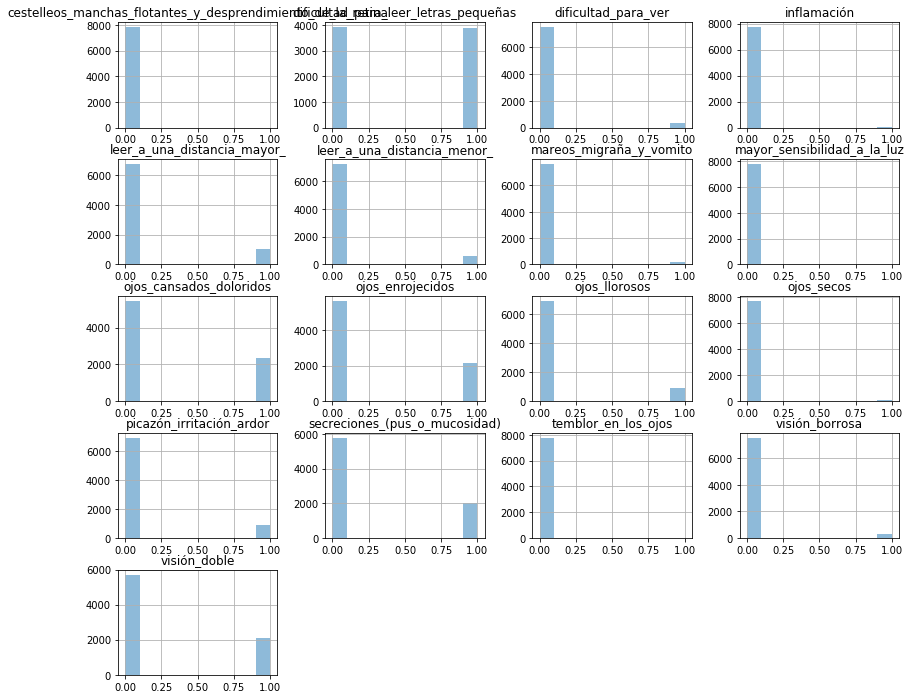

In [242]:
optometria_dep[['picazón_irritación_ardor', 'ojos_cansados_doloridos', 'ojos_llorosos', 'ojos_secos', 'visión_borrosa', 'visión_doble',  'mayor_sensibilidad_a_la_luz', 'dificultad_para_ver', 'dificultad_para_leer_letras_pequeñas', 'leer_a_una_distancia_mayor_', 'secreciones_(pus_o_mucosidad)', 'leer_a_una_distancia_menor_', 'ojos_enrojecidos', 'mareos_migraña_y_vomito', 'inflamación', 'temblor_en_los_ojos',        'cestelleos_manchas_flotantes_y_desprendimiento_de_la_retina']].hist(alpha = 0.5, figsize = (14,12))

REDUCCION DE CARACTERISTICAS 

Una vez se ha revisado la información contenida en cada una de las columnas del dataframe y aplicado limpieza sobre ellas, se procede a realizar análisis de las dimensiones

De la limpieza de datos se concluye:

- La variable Enfermedad se abre en tres variables:

  * Hipertensión
  * Glaucoma
  * Diabetes

- Todos los valores 'na' de las mediciones no pueden ser interpretados como valores cero

- Dado que el campo consulta indica si recibio consulta o no y para los datos del dataframe no hay varibilidad mostrada con una desviación estandar igual a cero, esta columna puede ser eliminada

- Las columnas de montura y estuche y paño juntas significa que una persona luego de ser atendido por el optómetra le fueron recetados lentes, esta información se consolida en requiere_gafas

- Las caracteristicas genero, usa_gafas, exam_ojos, tiem_gafas, pueden ser eliminadas ya que fueron numerizadas.

In [136]:
optometria_dep.drop(['enfermedad','consulta','montura', 'estuche y paño', 'genero', 'usa_gafas', 'exam_ojos', 'tiem_gafas'], axis = 1, inplace = True)

Construcción de la variable objetivo

In [137]:
optometria_dep['astigmatismo'] = np.where(optometria_dep['diagnostico'] == 'H522',1,0) #1 Tiene astigmatismo, 0 No
#H522 astigmatismo
#H521 miopia
#H524 presbicia 

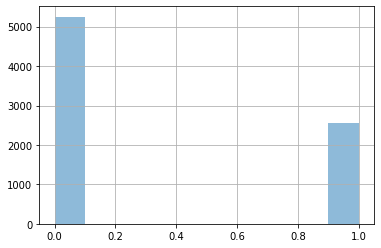

In [47]:
optometria_dep['astigmatismo'].hist(alpha = 0.5)

Las clases estan desbalanceadas, es importante al aplicar un modelo de machine learning balancear las clases

In [138]:
#Se elimina la caracteriticas diagnostico ya que redunda con la variable objetivo
optometria_dep.drop(['diagnostico'], axis = 1, inplace = True)

Dado que varias de las variables de medición óptica esan de tipo object y para efectos del balanceo deben ser númericas, se hace la conversión

In [139]:
optometria_dep['esfera-od'] = optometria_dep['esfera-od'].astype(float)
optometria_dep['cilindro-od'] = optometria_dep['cilindro-od'].astype(float)
optometria_dep['eje-od'] = optometria_dep['cilindro-od'].astype(float)
optometria_dep['add-od'] = optometria_dep['add-od'].astype(float)
optometria_dep['esfera-oi'] = optometria_dep['esfera-oi'].astype(float)
optometria_dep['cilindro-oi'] = optometria_dep['cilindro-oi'].astype(float)
optometria_dep['eje-oi'] = optometria_dep['eje-oi'].astype(float)
optometria_dep['add-oi'] = optometria_dep['add-oi'].astype(float)

Existen tipos de lentes de acuerdo a las medidas tomadas en la revisión:
- Esfericos Monofocal. Tienen valores en las esferas (EM)
- Esferocilindricos Monofocal. Tiene esfera, cilindro y eje (ECM)
- Esfericos Bifocal. Tiene esfera y adición (EB)
- Esferocilindricos Bifocal. Tienen esfera, cilindro, eje y adición (ECB)

In [140]:
optometria_dep['lente_EM_oi'] = np.where((optometria_dep['esfera-oi'].notna()) & (np.isnan(optometria_dep['cilindro-oi'])) & (np.isnan(optometria_dep['eje-oi'])) & (np.isnan(optometria_dep['add-oi'])),1,0)

optometria_dep['lente_ECM_oi'] = np.where((optometria_dep['esfera-oi'].notna()) & (optometria_dep['cilindro-oi'].notna()) & (optometria_dep['eje-oi'].notna()) & (np.isnan(optometria_dep['add-oi'])),1,0)

optometria_dep['lente_EB_oi'] = np.where((optometria_dep['esfera-oi'].notna()) & (np.isnan(optometria_dep['cilindro-oi'])) & (np.isnan(optometria_dep['eje-oi'])) & (optometria_dep['add-oi'].notna()),1,0)

optometria_dep['lente_ECB_oi'] = np.where((optometria_dep['esfera-oi'].notna()) & (optometria_dep['cilindro-oi'].notna()) & (optometria_dep['eje-oi'].notna()) & (optometria_dep['add-oi'].notna()),1,0)

In [141]:
optometria_dep['lente_EM_od'] = np.where((optometria_dep['esfera-od'].notna()) & (np.isnan(optometria_dep['cilindro-od'])) & (np.isnan(optometria_dep['eje-od'])) & (np.isnan(optometria_dep['add-od'])),1,0)

optometria_dep['lente_ECM_od'] = np.where((optometria_dep['esfera-od'].notna()) & (optometria_dep['cilindro-od'].notna()) & (optometria_dep['eje-od'].notna()) & (np.isnan(optometria_dep['add-od'])),1,0)

optometria_dep['lente_EB_od'] = np.where((optometria_dep['esfera-od'].notna()) & (np.isnan(optometria_dep['cilindro-od'])) & (np.isnan(optometria_dep['eje-od'])) & (optometria_dep['add-od'].notna()),1,0)

optometria_dep['lente_ECB_od'] = np.where((optometria_dep['esfera-od'].notna()) & (optometria_dep['cilindro-od'].notna()) & (optometria_dep['eje-od'].notna()) & (optometria_dep['add-od'].notna()),1,0)

Análisis descriptivo de las variables una vez realizado la seleccón de caracteristicas

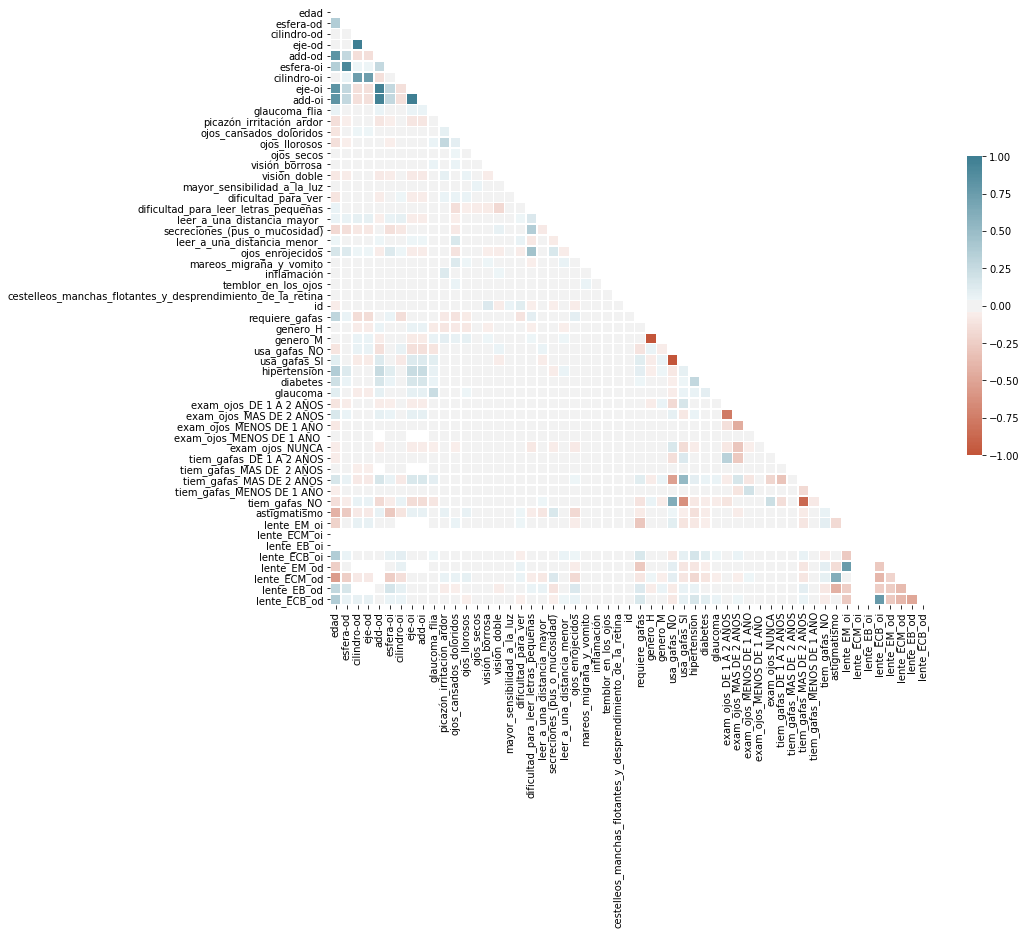

In [142]:
matriz_corr = optometria_dep.corr()
mask = np.triu(np.ones_like(matriz_corr, dtype=np.bool))
f, ax = plt.subplots(figsize=(14, 11))
cmap = sn.diverging_palette(20, 220, n = 200)
sn.heatmap(matriz_corr, mask = mask, cmap=cmap, vmin = -1, vmax = 1, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

**Conclusiones matriz de correlación**

Correlaciones positivas
- edad y add-oi
- edad y add-od
- edad y eje-oi
- esfera-oi y esfera-od
- eje-od y cilindro-od
- add-od y eje-oi
- add-od y add-oi
- add-oi y eje-oi
- lente_EBC_od y lente_EBC_oi


Correlaciones negativas
- tiem_gafas_MAS DE 2 AÑOS y tiem_gafas_NO
- genero_H y genero_M
- usa_gafas_NO y usa_gafas_SI

In [95]:
# columnas = []

In [145]:
optometria = optometria_dep #[columnas]

[Text(0.5, 0, 'edad'),
 Text(1.5, 0, 'esfera-od'),
 Text(2.5, 0, 'cilindro-od'),
 Text(3.5, 0, 'eje-od'),
 Text(4.5, 0, 'add-od'),
 Text(5.5, 0, 'tipo lente-od'),
 Text(6.5, 0, 'esfera-oi'),
 Text(7.5, 0, 'cilindro-oi'),
 Text(8.5, 0, 'eje-oi'),
 Text(9.5, 0, 'add-oi'),
 Text(10.5, 0, 'tipo lente-oi'),
 Text(11.5, 0, 'hipertension'),
 Text(12.5, 0, 'diabetes'),
 Text(13.5, 0, 'glaucoma'),
 Text(14.5, 0, 'astigmatismo'),
 Text(15.5, 0, 'exam_ojos_DE 1 A 2 AÑOS'),
 Text(16.5, 0, 'exam_ojos_MAS DE 2 AÑOS'),
 Text(17.5, 0, 'exam_ojos_MENOS DE 1 AÑO'),
 Text(18.5, 0, 'exam_ojos_MENOS DE 1 AÑO '),
 Text(19.5, 0, 'exam_ojos_NUNCA'),
 Text(20.5, 0, 'tiem_gafas_DE 1 A 2 AÑOS'),
 Text(21.5, 0, 'tiem_gafas_MAS DE  2 AÑOS'),
 Text(22.5, 0, 'tiem_gafas_MAS DE 2 AÑOS'),
 Text(23.5, 0, 'tiem_gafas_MENOS DE 1 AÑO'),
 Text(24.5, 0, 'tiem_gafas_NO')]

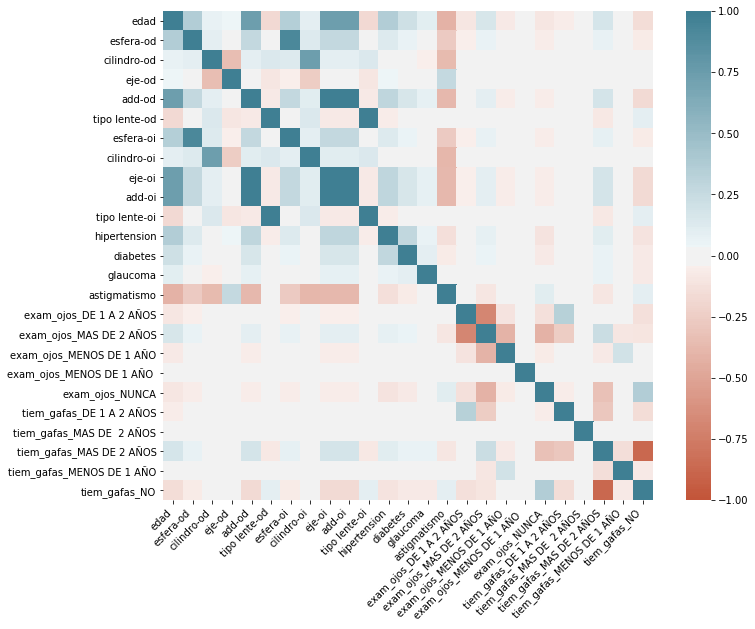

In [130]:
# matriz_corr_new = optometria.corr()
# plt.figure(figsize=(12, 9))
# ax = sn.heatmap(matriz_corr_new, vmin = -1, vmax = 1, center = 0, cmap = sn.diverging_palette(20, 220, n = 200), square=True)
# ax.set_xticklabels(ax.get_xticklabels(), rotation = 45, horizontalalignment = 'right')

Luego de seleccionar solo las caracteristicas ......

In [168]:
sn.pairplot(optometria, hue = 'astigmatismo')

Extraccón de caracteristicas usando:

- Árbol de decisión
- Bosque aleatorio
- PCA

División de datos de entrenamiento y prueba

In [146]:
modelos_vbles = optometria.drop('astigmatismo', axis = 1)
X = modelos_vbles
y = optometria.astigmatismo
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 1, stratify = y)

Balanceo de Clases

In [147]:
sm = SMOTE(random_state = 0)
x_est, y_est = sm.fit_sample(x_train, y_train)

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

In [87]:
y_est.hist()

NameError: name 'y_est' is not defined

Árbol de decisiones

In [148]:
arbol = DecisionTreeClassifier(random_state=0)
arbol.fit(x_train, y_train)
y_pred = arbol.predict(x_test)

ValueError: Input contains NaN, infinity or a value too large for dtype('float32').

In [186]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.8264428980761359


In [187]:
mask = arbol.feature_importances_ > 0.09
reduced_X = X.loc[:,mask]
print(reduced_X.columns)

Index(['edad', 'cilindro-oi'], dtype='object')


In [179]:
print(dict(zip(X.columns, arbol.feature_importances_.round(2))))

{'edad': 0.21, 'esfera-od': 0.04, 'cilindro-od': 0.06, 'eje-od': 0.04, 'tipo lente-od': 0.02, 'esfera-oi': 0.07, 'cilindro-oi': 0.39, 'eje-oi': 0.02, 'add-oi': 0.02, 'tipo lente-oi': 0.02, 'requiere_gafas': 0.0, 'hipertension': 0.01, 'diabetes': 0.01, 'glaucoma': 0.0, 'exam_ojos_DE 1 A 2 AÑOS': 0.02, 'exam_ojos_MAS DE 2 AÑOS': 0.02, 'exam_ojos_MENOS DE 1 AÑO': 0.02, 'exam_ojos_MENOS DE 1 AÑO ': 0.0, 'exam_ojos_NUNCA': 0.0, 'tiem_gafas_DE 1 A 2 AÑOS': 0.0, 'tiem_gafas_MAS DE  2 AÑOS': 0.0, 'tiem_gafas_MAS DE 2 AÑOS': 0.01, 'tiem_gafas_MENOS DE 1 AÑO': 0.0, 'tiem_gafas_NO': 0.01}


Bosque Aleatorio

In [138]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(random_state=0)
rf.fit(x_est, y_est)
print(dict(zip(X.columns, rf.feature_importances_.round(2))))

{'edad': 0.12, 'esfera-od': 0.07, 'cilindro-od': 0.16, 'eje-od': 0.07, 'tipo lente-od': 0.05, 'esfera-oi': 0.07, 'cilindro-oi': 0.2, 'eje-oi': 0.07, 'add-oi': 0.05, 'tipo lente-oi': 0.05, 'requiere_gafas': 0.0, 'hipertension': 0.01, 'diabetes': 0.01, 'glaucoma': 0.0, 'exam_ojos_DE 1 A 2 AÑOS': 0.01, 'exam_ojos_MAS DE 2 AÑOS': 0.02, 'exam_ojos_MENOS DE 1 AÑO': 0.01, 'exam_ojos_MENOS DE 1 AÑO ': 0.0, 'exam_ojos_NUNCA': 0.01, 'tiem_gafas_DE 1 A 2 AÑOS': 0.0, 'tiem_gafas_MAS DE  2 AÑOS': 0.0, 'tiem_gafas_MAS DE 2 AÑOS': 0.02, 'tiem_gafas_MENOS DE 1 AÑO': 0.0, 'tiem_gafas_NO': 0.01}


PCA

In [142]:
#Escalar los datos
x = StandardScaler().fit_transform(X)

In [ ]:
Se revisa que la normalización de los datos tengan media cero y desviación estandar de uno

In [143]:
print('Media: ', np.mean(x))
print('Desviación estándar: ', np.std(x))

Media:  -4.3047330996968696e-17
Desviación estándar:  1.0


In [160]:
from sklearn.decomposition import PCA
pca_opt = PCA(n_components=2)
principalComponents = pca_opt.fit_transform(x)

In [155]:
optometria_PCA = pd.DataFrame(data = principalComponents, columns = ['PCA1', 'PCA2'])

In [156]:
optometria_PCA.head(2)

,PCA1,PCA2
0,-0.327308,-0.707339
1,1.704789,-1.630114


In [167]:
explained_variance = np.var(principalComponents, axis=0)
explained_variance_ratio = explained_variance / np.sum(explained_variance)
#print('Varianza: ', explained_variance)
print('Ratio de varianza ',explained_variance_ratio)

Ratio de varianza  [0.57261918 0.42738082]


El componente 1 explica el 57% de la información mientras que el componente 2 contiene 42% de la información. Proyectar la data a dos dimensiones se pierde casi el 1% de información.